In [1]:
%matplotlib inline
import sklearn
import keras
import matplotlib.pylab as plt
import matplotlib as mp
import numpy as np
import scipy as sp

Using Theano backend.


In [2]:
#mp.style.use('seaborn-pastel')

In [3]:
datamatrix = sp.random.rand(10,100)<0.1

In [4]:
import scipy.io as sio
ft=sio.loadmat("firingTimes.mat")

In [5]:
ft.keys()

['totalTime',
 'spikes',
 'all_v_mat',
 'allSpikes',
 'firings2',
 '__header__',
 '__globals__',
 'allFirings',
 'firings',
 'neuronsWithInput',
 'spikes2',
 '__version__',
 'v_mat',
 'v_mat2']

/home/pritish/installations/python-venvs/moose/local/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


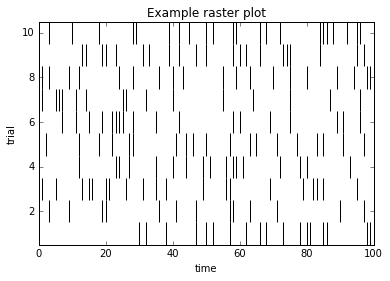

In [6]:

def raster(event_times_list, color='k'):
    """
    Creates a raster plot
    Parameters
    ----------
    event_times_list : iterable
                       a list of event time iterables
    color : string
            color of vlines
    Returns
    -------
    ax : an axis containing the raster plot
    """
    ax = plt.gca()
    for ith, trial in enumerate(event_times_list):
        plt.vlines(trial, ith + .5, ith + 1.5, color=color)
    plt.ylim(.5, len(event_times_list) + .5)
    return ax

nbins = 100
ntrials = 10
spikes = []
for i in range(ntrials):
    spikes.append(np.arange(nbins)[np.random.rand(nbins) < .2])

fig = plt.figure()
ax = raster(spikes)
plt.title('Example raster plot')
plt.xlabel('time')
plt.ylabel('trial')
fig.show()

# Figure 1 :

In [7]:
print ft.keys()
allSpikes=ft['allSpikes']
totalTime=ft['totalTime']*1.0


['totalTime', 'spikes', 'all_v_mat', 'allSpikes', 'firings2', '__header__', '__globals__', 'allFirings', 'firings', 'neuronsWithInput', 'spikes2', '__version__', 'v_mat', 'v_mat2']


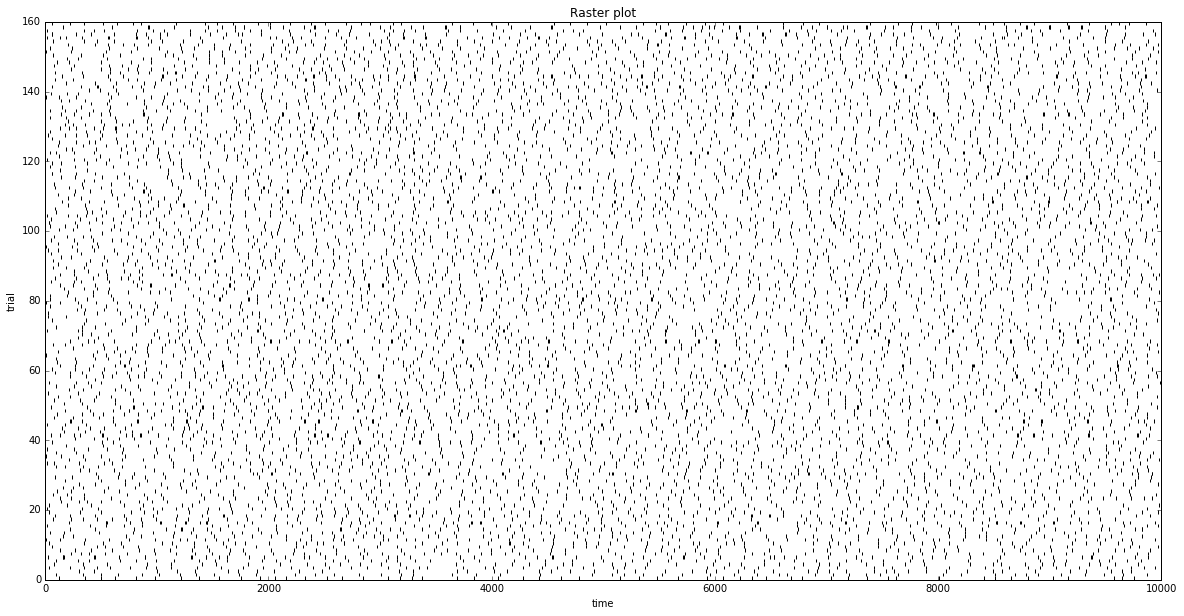

In [8]:
neurons,time=np.where(allSpikes==1)
# plt.figure(figsize=(10, 10))
# plt.scatter(time,neurons,color="k",marker='|')
# plt.show()

plt.figure(figsize=(20, 10))
plt.vlines(time,neurons,neurons+1)
plt.title('Raster plot')
plt.xlabel('time')
plt.ylabel('trial')
plt.show()

# Figure 2

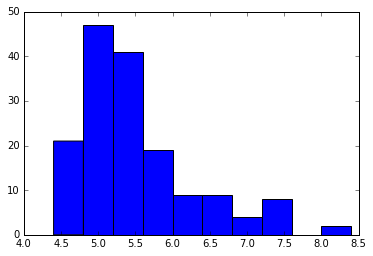

In [9]:
sp_per_sec = np.array(sum(allSpikes.T,1)/totalTime*1000)[0] #; % spikes per sec
# print sp_per_sec
plt.figure()
plt.hist(sp_per_sec,bins=10)
plt.show()

# Figure 3 

<function matplotlib.pyplot.colorbar>

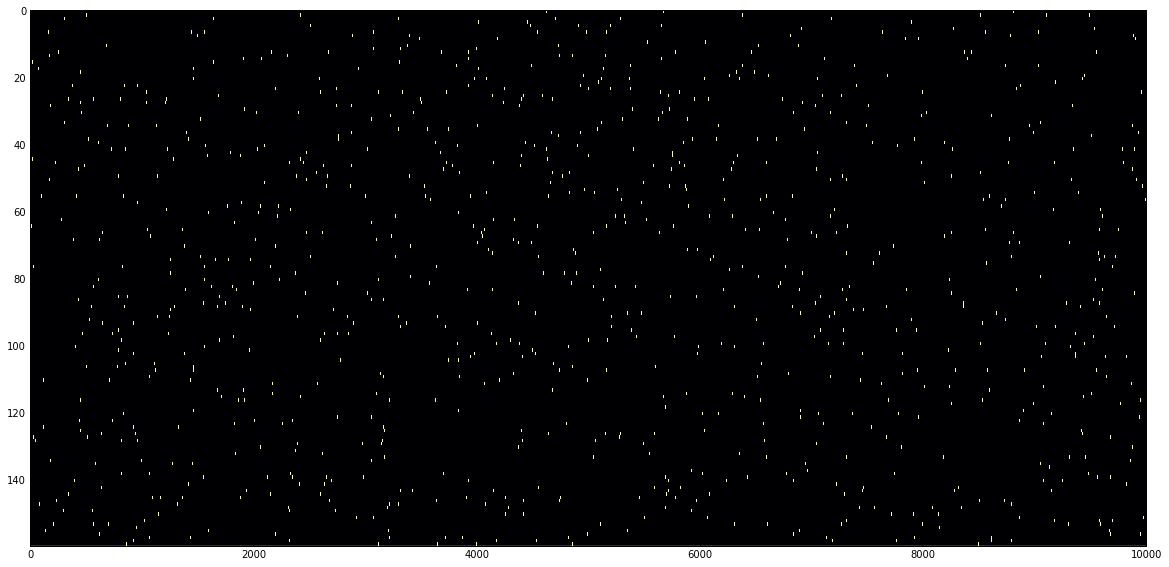

In [10]:
#print allSpikes[0,:]
plt.figure(figsize=(20, 10))
plt.imshow(allSpikes,aspect=30,cmap='magma',interpolation="None")
plt.colorbar

In [36]:
integrationWindow = 200#; %ms

#arr=sp.ndimage.filters.gaussian_filter1d(allSpikes[1:3,:],10,mode='constant')
unif_filter=np.zeros(allSpikes.shape)
gaus_filter=np.zeros(allSpikes.shape)
#plt.imshow(allSpikes*1000,aspect=40)
for i in range(allSpikes.shape[0]):
    unif_filter[i,:]=sp.ndimage.filters.uniform_filter1d(allSpikes[i,:]*1000,100,mode='constant')
    gaus_filter[i,:]=sp.ndimage.filters.gaussian_filter1d(allSpikes[i,:]*1000,10,mode='constant')

    


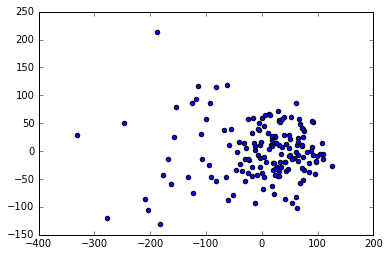

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(gaus_filter - np.mean(gaus_filter))
reduced_data = PCA(n_components=2).fit_transform(gaus_filter - np.mean(gaus_filter))
plt.scatter(reduced_data[:,0],reduced_data[:,1])

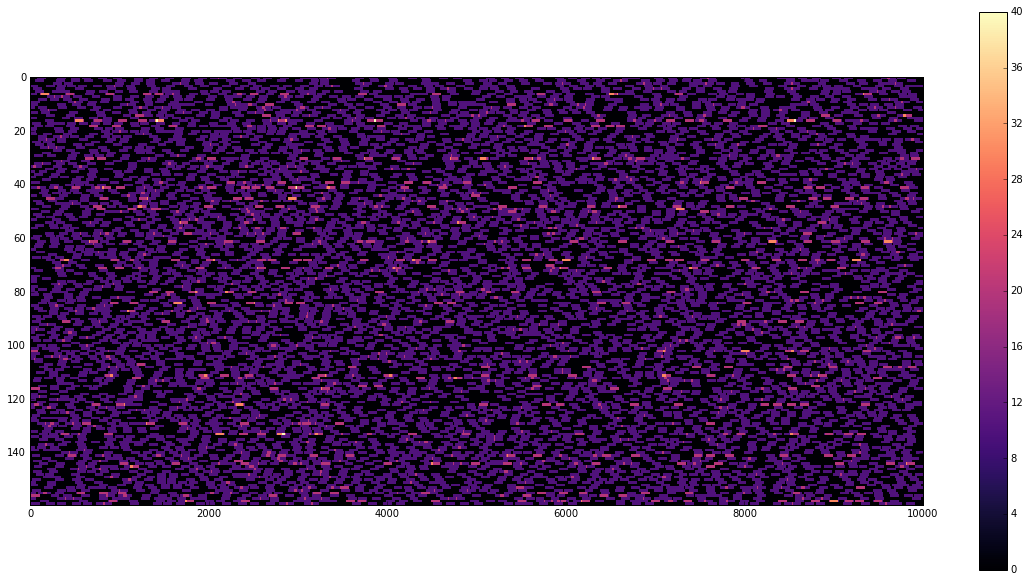

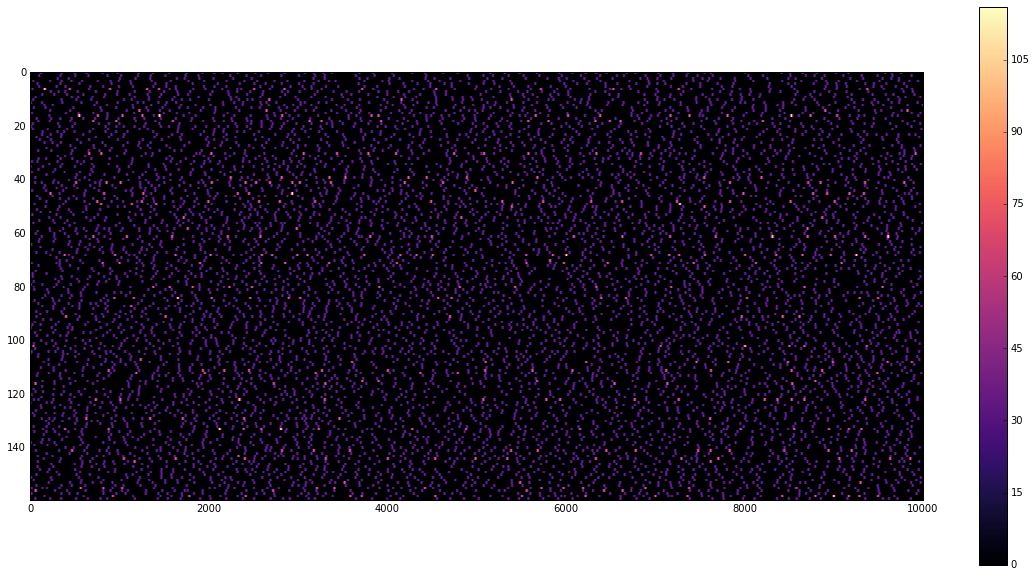

In [37]:
plt.figure(figsize=(20, 10))
plt.imshow(unif_filter,aspect=30,cmap='magma',interpolation="None")
plt.colorbar()

plt.figure(figsize=(20, 10))
plt.imshow(gaus_filter,aspect=30,cmap='magma',interpolation="None")
plt.colorbar()

# add the sample kmeans from the sklearn example.

Initialization complete
Iteration  0, inertia 370.448
Iteration  1, inertia 295.075
Converged at iteration 1
Initialization complete
Iteration  0, inertia 385.923
Iteration  1, inertia 295.075
Converged at iteration 1
Initialization complete
Iteration  0, inertia 594.671
Iteration  1, inertia 295.075
Converged at iteration 1
Initialization complete
Iteration  0, inertia 855.527
Iteration  1, inertia 299.413
Iteration  2, inertia 295.075
Converged at iteration 2
Initialization complete
Iteration  0, inertia 802.679
Iteration  1, inertia 295.581
Iteration  2, inertia 295.075
Converged at iteration 2
Initialization complete
Iteration  0, inertia 543.996
Iteration  1, inertia 295.581
Iteration  2, inertia 295.075
Converged at iteration 2
Initialization complete
Iteration  0, inertia 427.727
Iteration  1, inertia 295.075
Converged at iteration 1
Initialization complete
Iteration  0, inertia 492.233
Iteration  1, inertia 295.075
Converged at iteration 1
Initialization complete
Iteration  0, 

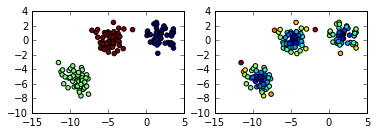

In [67]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


n_samples = 150
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)



# Incorrect number of clusters

km=KMeans(n_clusters=3, random_state=random_state,precompute_distances=True,verbose=True)
y_pred = km.fit_predict(X)
labels=km.labels_
cluster_centers=km.cluster_centers_

def calc_dist(labels,X,cluster_centers):
    Y=np.zeros(X.shape[0])
    for i,j in enumerate(labels):
        Y[i]=np.linalg.norm(X[i,:]-cluster_centers[j])
    print Y
    return Y
        

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

dist = calc_dist(labels,X,cluster_centers)

plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=dist)


In [41]:
print KMeans.__doc__

K-Means clustering

    Read more in the :ref:`User Guide <k_means>`.

    Parameters
    ----------

    n_clusters : int, optional, default: 8
        The number of clusters to form as well as the number of
        centroids to generate.

    max_iter : int, default: 300
        Maximum number of iterations of the k-means algorithm for a
        single run.

    n_init : int, default: 10
        Number of time the k-means algorithm will be run with different
        centroid seeds. The final results will be the best output of
        n_init consecutive runs in terms of inertia.

    init : {'k-means++', 'random' or an ndarray}
        Method for initialization, defaults to 'k-means++':

        'k-means++' : selects initial cluster centers for k-mean
        clustering in a smart way to speed up convergence. See section
        Notes in k_init for more details.

        'random': choose k observations (rows) at random from data for
        the initial centroids.

        If an ndarra

# GLM